# <font color="maganta"><h3 align="center">K-Means Cluster</h3></font> 

<h3 style = "color:brown" >Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from kneed import KneeLocator

import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<h3 style = "color:brown" >Data Reading</h3>

In [2]:
df = pd.read_csv("mall customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop(['CustomerID','Gender'],axis=1, inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [4]:
df.rename(columns = {'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace = True)

In [5]:
df

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


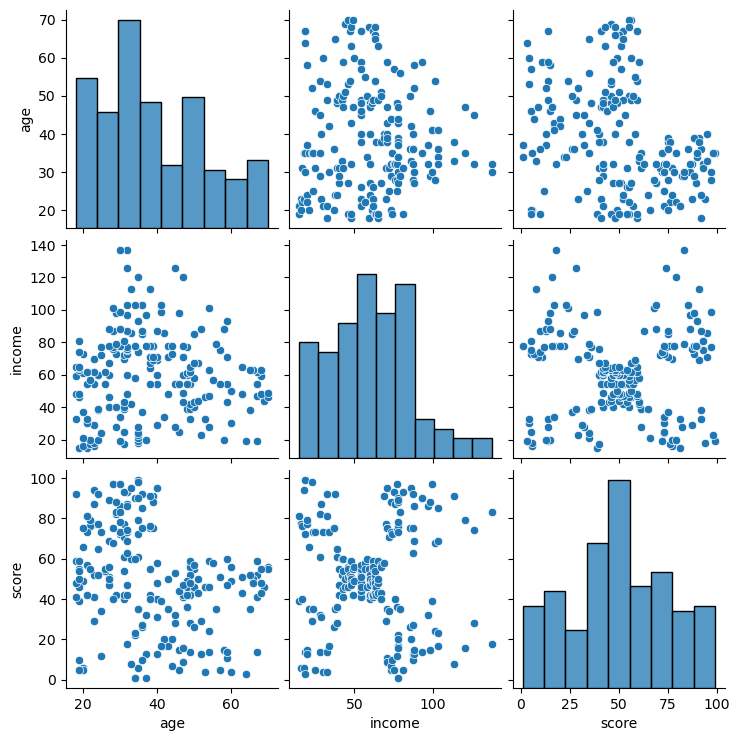

In [6]:
import seaborn as sb
sb.pairplot(df[['age','income','score']])
plt.savefig('pairplot.png')

<h1 style = "color:green">Implementing K-Means Cluster</h1>

In [7]:
from sklearn.cluster import KMeans
km = KMeans()  #default n_clusters = 8

In [8]:
df['Group1']= km.fit_predict(df[['score', 'income']])

In [9]:
df

,age,income,score,Group1
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3
...,...,...,...,...
195,35,120,79,7
196,45,126,28,4
197,32,126,74,7
198,32,137,18,4


In [10]:
centroid = km.cluster_centers_
centroid

array([[ 46.1627907 ,  63.72093023],
       [ 82.9375    ,  80.375     ],
       [ 80.04761905,  25.0952381 ],
       [ 20.22727273,  25.72727273],
       [ 22.        , 109.7       ],
       [ 51.79069767,  47.51162791],
       [ 12.68181818,  80.18181818],
       [ 78.42857143, 114.71428571]])

In [11]:
df0 = df[df.Group1==0]
df1 = df[df.Group1==1]
df2 = df[df.Group1==2]
df3 = df[df.Group1==3]
df4 = df[df.Group1==4]
df5 = df[df.Group1==5]
df6 = df[df.Group1==6]
df7 = df[df.Group1==7]

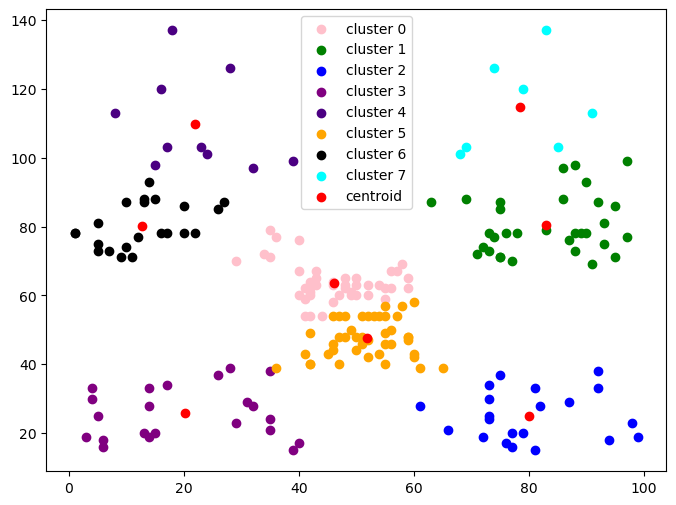

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df0.score, df0.income,color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income,color='green', label='cluster 1')
plt.scatter(df2.score, df2.income,color='blue', label='cluster 2')
plt.scatter(df3.score, df3.income,color='purple', label='cluster 3')
plt.scatter(df4.score, df4.income,color='indigo', label='cluster 4')
plt.scatter(df5.score, df5.income,color='orange', label='cluster 5')
plt.scatter(df6.score, df6.income,color='black', label='cluster 6')
plt.scatter(df7.score, df7.income,color='cyan', label='cluster 7')

plt.scatter(centroid[:,0],centroid[:,1], color = 'red', label = 'centroid')

plt.legend()
plt.show()

<h2 style = "color:green">Optimizing KMeans</h2>

In [13]:
"""
In scikit-learn's KMeans implementation, "inertia_" is an attribute that represents the WCSS.
WCSS is the "sum of squared distances between each data point in a cluster and its centroid".
It is a measure of how internally coherent the clusters are.

"""
wcss = []
cluster = range(1,15)
for k in cluster:
    km2 = KMeans(n_clusters = k)
    km2.fit(df[['score','income']])
    wcss.append(km2.inertia_)

In [14]:
wcss

[269981.28,
 183257.86154461783,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30273.39431207004,
 25061.264092290687,
 22122.192456961642,
 19634.55462934998,
 17643.55156000191,
 16018.377633746182,
 14617.105442048989,
 13443.287012987012]

Text(0, 0.5, 'WCSS')

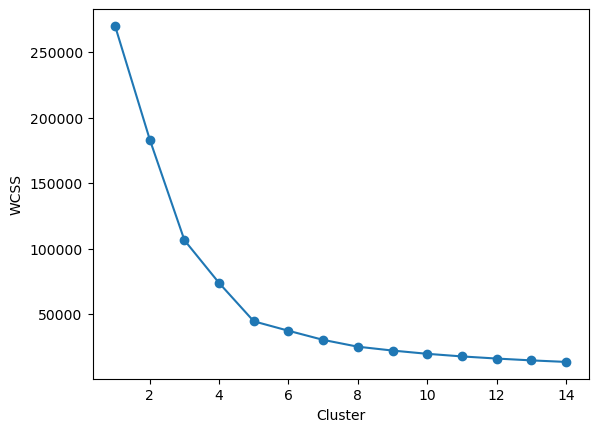

In [15]:
plt.plot(range(1,15), wcss, marker = 'o')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

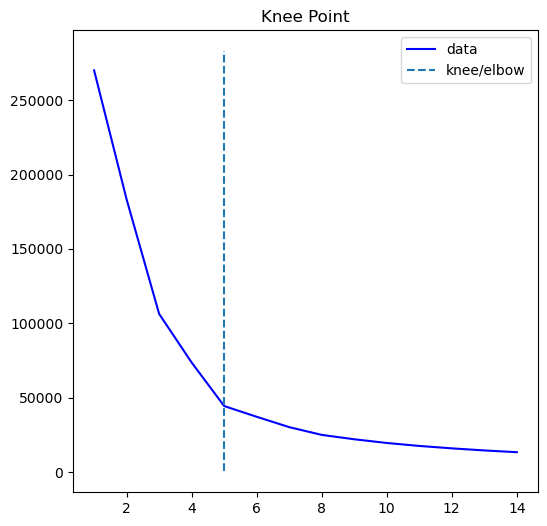

In [16]:
from kneed import KneeLocator

kn = KneeLocator(cluster, wcss, direction='decreasing', curve='convex')

kn.plot_knee()

In [17]:
kn.knee

5

<h2 style = "color:green">After Optimizing</h2>

In [18]:
km = KMeans(n_clusters=5) #i know 5 is optimal
df['Group2'] = km.fit_predict(df[['score', 'income']])

In [19]:
df

,age,income,score,Group1,Group2
0,19,15,39,3,3
1,21,15,81,2,1
2,20,16,6,3,3
3,23,16,77,2,1
4,31,17,40,3,3
...,...,...,...,...,...
195,35,120,79,7,2
196,45,126,28,4,4
197,32,126,74,7,2
198,32,137,18,4,4


In [20]:
cen = km.cluster_centers_
cen

array([[49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [17.11428571, 88.2       ]])

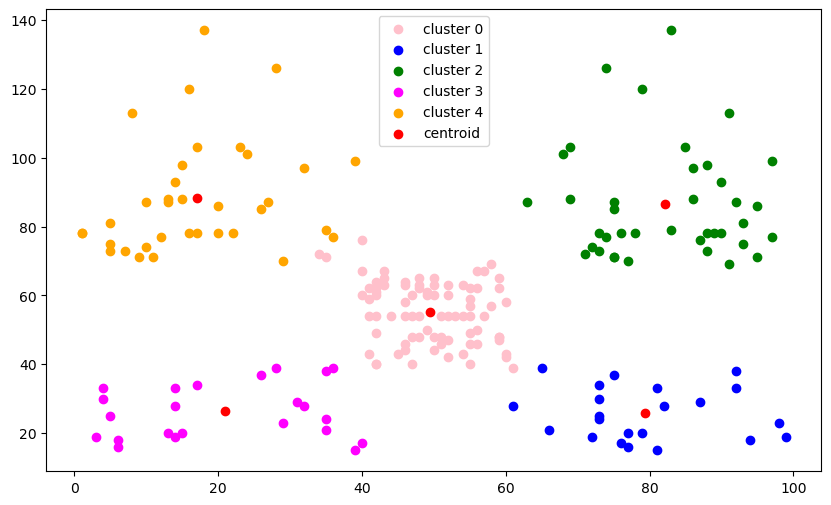

In [21]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid')

plt.legend()
plt.show()